# Aprendizaje Evolutivo (Regre Logistica)

In [1]:
!pip install openpyxl
!pip install statsmodels

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image, display
# import pydotplus
from sklearn import tree


import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import mode

import statsmodels.formula.api as smf

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV , RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import plot_tree
from scipy.spatial import distance

from warnings import filterwarnings
filterwarnings('ignore')

sns.set()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 36.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 107.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 53.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
def modelGenerator(criteria):   
    
    genome2Use = [bool(item) for item in criteria]
    col2Use = X[X.columns[genome2Use]].columns
    y = df.marca_exito

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Train Decision Tree Classifer
    model.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = model.predict(X_test)

    return metrics.accuracy_score(y_test, y_pred)



In [3]:
def fitness_score(iterations) :
    global populations, best
    fit_value = []
    fit_score=[]

    for i in range(iterations):
        chromosome_value = boolArrGen(lenGenome)
        fit_value.append(modelGenerator(chromosome_value))

    fit_value, populations = zip(*sorted(zip(fit_value, populations) , reverse = True))
    best= fit_value[0]


In [4]:
def selectparent():
    global parents
    parents=populations[0:2]

In [5]:
def crossover() :
    global parents
    
    while sum(parents[0]) <= 0 and sum(parents[1]) <= 0:
        cross_point = random.randint(0,lenGenome)
        parents = parents + tuple([(parents[0][0:cross_point +1] + parents[1][cross_point+1:lenGenome])])
        parents = parents + tuple([(parents[1][0:cross_point +1] + parents[0][cross_point+1:lenGenome])])

In [6]:
def mutation() :
    global populations, parents
    mute = random.randint(0,49)
    if mute == 20 :
        x = random.randint(0, 1)
        y = random.randint(0,lenGenome-1)
        parents[x][y] = 1-parents[x][y]

        while parents[x][y] <= 0:
            x = random.randint(0,1)
            y = random.randint(0,lenGenome-1)
            parents[x][y] = 1-parents[x][y]

    populations = parents

In [7]:
def boolArrGen(sizeR):
    initial_arr = [True, False]
    arr = [False]

    while sum(arr) <= 0:
        arr = np.random.choice(initial_arr, size=sizeR)
        
    bool_arr = list(map(bool, arr))
    
    return bool_arr

In [8]:
# df = pd.read_excel('/work/Data Modelos.xlsx')

# # creando marca de éxito
# df['marca_exito'] = [1 if i > 3 else 0 for i in df['Porcentaje de clics de las impresiones (%)']]
# col_names = df.columns
# df.info()

In [9]:
# aprioriCols = ['suscriptores', 'Densidad_Publicitaria', 'Duracion Minutos', 'dia_semana', 'consecutivo_tema', 'Tiempo de visualizaci√≥n (horas)']
# # dfx= df[col_names.drop('marca_exito')]
# dfx=df[aprioriCols]
# len(dfx.columns)

In [14]:
df = pd.read_excel('/work/Data Modelos.xlsx')
df.columns
X = df.drop(['marca_exito', 'Porcentaje de clics de las impresiones (%)', 'RPM (USD)'], axis= 1)

random_grid = {'penalty': ["l1","l2", "elasticnet", "none"],
            'C': np.linspace(0,3,1000),
            "solver": ["liblinear", "sag", "saga"]}

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

model = LogisticRegression() 

best=-100000
lenGenome = len(X.columns)
populationSize = 32
# generations = 300
generations = 0
iterations = 20
bestResults = []
currResult = -1
parents=[]
new_populations = []
populations =([boolArrGen(lenGenome) for i in range(populationSize)])

print(f'Initial Population = {populations}')


# for i in range(generations):
while generations <= 1000:
    fitness_score(iterations)
    selectparent() 
    crossover()
    mutation()
    currResult = modelGenerator(populations[0])
    bestResults.append(currResult)
    generations += 1
    

finalGenome = [bool(item) for item in populations[0]]
print(f'Incumbent solution found after {generations} generations: Accuracy {modelGenerator(populations[0])} with Genome {finalGenome}')
print(f'Refering to the vairables {X[X.columns[finalGenome]].columns.values} ')


Initial Population = [[False, True, False, True, False, False, False, True, False, False, False, False, False, True, False], [True, True, True, False, False, True, True, True, False, True, True, False, True, True, False], [True, True, False, True, True, False, True, False, False, True, True, True, True, False, True], [False, False, True, True, False, False, False, True, True, True, False, False, False, True, True], [False, True, False, False, False, False, True, True, True, True, True, False, False, False, True], [False, True, True, False, True, False, True, True, False, True, False, False, False, False, True], [True, True, False, False, True, True, False, False, False, False, False, True, True, False, True], [True, True, False, True, True, True, False, True, False, True, False, True, True, True, False], [False, True, False, False, True, True, True, True, True, False, True, False, False, True, True], [False, True, False, True, False, False, True, True, False, False, True, True, False, 

In [16]:
df

,Suscriptores ganados,Tiempo de visualizaci√≥n (horas),Me gusta,Clics en teaser de tarjeta,Tarjetas mostradas,Clics en elementos de pantalla final,suscriptores,Densidad_Publicitaria,Porcentaje de clics de las impresiones (%),Duracion Minutos,Comentarios a√±adidos,Porcentaje medio visto (%),rating,dia_semana,consecutivo_tema,No me gusta,RPM (USD),marca_exito
0,0,0.0015,0,0,0,0,1,0.000,0.00,7.533333,0,1.31,4.901235,3,14,0,0.000,0
1,0,0.3858,0,0,0,0,5,0.312,8.13,12.800000,0,12.97,4.614458,1,5,1,0.769,1
2,0,22895.0000,1,0,0,1,35,0.228,3.14,35.066667,0,23.07,4.809524,1,4,0,3765.000,1
3,0,0.1308,0,0,0,0,15,0.234,1.45,12.833333,0,21.96,4.873303,1,16,0,0.000,0
4,0,0.1090,0,0,0,0,2,0.000,2.33,6.633333,0,28.11,4.777778,3,14,0,2667.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.5448,0,0,0,0,11,0.183,2.76,10.900000,0,46.93,4.900000,3,10,0,1429.000,0
96,0,11181.0000,2,0,0,0,13,0.300,6.79,10.000000,0,41.93,4.909091,3,13,0,1.000,1
97,0,40887.0000,0,0,3,0,32,0.228,4.97,17.566667,0,52.20,5.000000,3,10,0,1741.000,1
98,0,0.5051,0,0,0,0,5,0.238,1.55,21.033333,0,36.93,4.894737,3,10,0,0.000,0


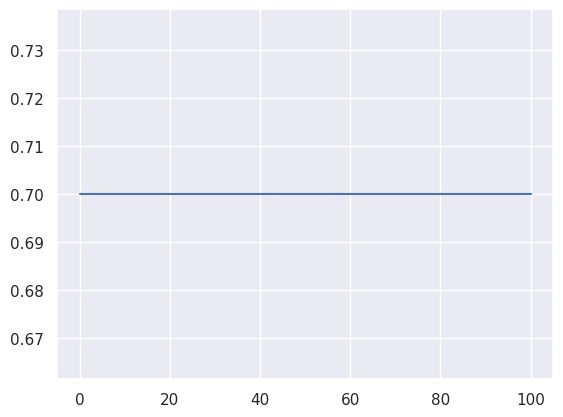

In [13]:
plt.plot(bestResults)

In [12]:
#metricas basadas en matriz de confusion y otras metricas del arbol de decision binario

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=af42914d-1d55-41f0-8851-adb5c602e38b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>